In [1]:
#Importing all the necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import eli5

pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn import metrics
from sklearn.metrics import classification_report
from pdpbox import pdp, info_plots
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt
from sklearn.metrics import roc_curve, roc_auc_score
RANDOM_SEED = 42


Bad key "text.kerning_factor" on line 4 in
c:\users\rohit\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#Loading training and test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [4]:
test_data

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,8.7625,-15.6305,18.8766,11.2864,11.8362,13.3680,-31.9891,12.1776,8.7714,17.2011,16.8508,13.0534,14.4069,-4.8525,7.3213,-0.5259,16.6365,19.3036,6.4129,-5.3948,9.3269,11.9314,-3.5750,-0.7706,0.8705,6.9282,2.8914,5.9744,17.4851,5.0125,-1.4230,33.3401,0.8018,-4.7906,30.2708,26.8339,21.7205,7.3075,14.0810,3.1192,17.4265,9.4883,16.9060,14.5117,10.0276,-0.9706,20.4588,4.7945,20.4160,13.1633,7.9307,-7.6509,7.0834,15.2324,10.1416,5.9156,-0.5775,5.7600,30.3238,2.1251,1.8585,-9.2198,17.3089,30.9548,1.4918,12.8721,3.4902,8.2856,11.9794,14.0176,15.0763,3.7662,6.0426,4.4243,14.1799,2.0921,1.5493,3.2206,0.0172,-6.6602,8.4785,42.0248,11.4164,0.4564,9.4006,0.9685,12.4929,14.1240,4.0388,-4.4442,16.6684,12.5380,0.9205,10.5998,7.5147,-4.1748,-0.4824,10.5267,17.7547,-6.5226,-2.5502,-5.1547,-2.1246,19.8319,13.0752,9.2275,3.0213,11.6793,-11.6827,4.1017,5.2954,18.7741,9.8892,7.5219,14.9745,18.9880,1.0842,11.9125,-4.5103,16.1361,11.0067,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,-1.5536,10.0309,3.1337,10.5742,11.7664,2.1782,-41.1924,13.5322,-17.3834,6.3806,12.5589,11.6887,25.3930,1.5776,6.8481,8.7348,16.4239,21.7056,6.9345,1.6678,9.5249,5.3383,-18.7083,1.3382,-1.7401,5.8398,3.1051,4.4307,16.0005,5.0306,-7.3365,12.2806,0.6992,-0.7772,21.5123,6.7803,18.1896,6.9388,22.1336,6.3755,13.1525,1.9772,14.0406,6.6904,9.9732,-11.5679,20.4525,9.4951,9.6343,8.1252,2.6059,-17.4201,7.1848,15.3484,10.6522,5.9897,0.3392,10.3516,29.8204,1.9998,-1.4166,-1.7257,15.4712,35.6020,1.6570,13.0783,2.7752,6.4986,4.6835,13.7963,17.7261,1.7375,5.5689,3.6609,8.9725,4.1159,1.0693,2.0234,8.2760,-6.8610,0.2780,17.0488,11.6704,3.1215,8.5093,5.6367,12.0099,14.2372,-

In [5]:
train_data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [6]:
test_data.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,8.7625,-15.6305,18.8766,11.2864,11.8362,13.3680,-31.9891,12.1776,8.7714,17.2011,16.8508,13.0534,14.4069,-4.8525,7.3213,-0.5259,16.6365,19.3036,6.4129,-5.3948,9.3269,11.9314,-3.5750,-0.7706,0.8705,6.9282,2.8914,5.9744,17.4851,5.0125,-1.4230,33.3401,0.8018,-4.7906,30.2708,26.8339,21.7205,7.3075,14.0810,3.1192,17.4265,9.4883,16.9060,14.5117,10.0276,-0.9706,20.4588,4.7945,20.4160,13.1633,7.9307,-7.6509,7.0834,15.2324,10.1416,5.9156,-0.5775,5.7600,30.3238,2.1251,1.8585,-9.2198,17.3089,30.9548,1.4918,12.8721,3.4902,8.2856,11.9794,14.0176,15.0763,3.7662,6.0426,4.4243,14.1799,2.0921,1.5493,3.2206,0.0172,-6.6602,8.4785,42.0248,11.4164,0.4564,9.4006,0.9685,12.4929,14.1240,4.0388,-4.4442,16.6684,12.5380,0.9205,10.5998,7.5147,-4.1748,-0.4824,10.5267,17.7547,-6.5226,-2.5502,-5.1547,-2.1246,19.8319,13.0752,9.2275,3.0213,11.6793,-11.6827,4.1017,5.2954,18.7741,9.8892,7.5219,14.9745,18.9880,1.0842,11.9125,-4.5103,16.1361,11.0067,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,-1.5536,10.0309,3.1337,10.5742,11.7664,2.1782,-41.1924,13.5322,-17.3834,6.3806,12.5589,11.6887,25.3930,1.5776,6.8481,8.7348,16.4239,21.7056,6.9345,1.6678,9.5249,5.3383,-18.7083,1.3382,-1.7401,5.8398,3.1051,4.4307,16.0005,5.0306,-7.3365,12.2806,0.6992,-0.7772,21.5123,6.7803,18.1896,6.9388,22.1336,6.3755,13.1525,1.9772,14.0406,6.6904,9.9732,-11.5679,20.4525,9.4951,9.6343,8.1252,2.6059,-17.4201,7.1848,15.3484,10.6522,5.9897,0.3392,10.3516,29.8204,1.9998,-1.4166,-1.7257,15.4712,35.6020,1.6570,13.0783,2.7752,6.4986,4.6835,13.7963,17.7261,1.7375,5.5689,3.6609,8.9725,4.1159,1.0693,2.0234,8.2760,-6.8610,0.2780,17.0488,11.6704,3.1215,8.5093,5.6367,12.0099,14.2372,-

In [7]:
train_data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

In [8]:
test_data.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000

In [9]:
# Function for finding missing values and datatypes of the features

def missing_data(data):
    missing = data.isnull().sum()
    df = pd.concat([missing], axis =1 , keys = ['Missing Values'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    df['Types'] = types
    return(np.transpose(df))

In [10]:
missing_data(train_data)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Missing Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Types,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [11]:
missing_data(test_data)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Missing Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Types,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


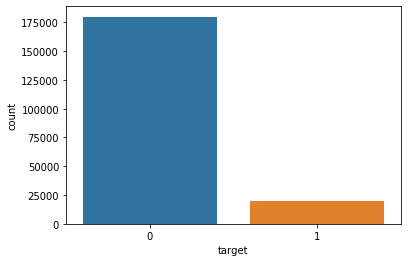

In [12]:
sns.countplot(train_data['target'])

It can be seen that out data is imbalanced.

In [13]:
print("{}% target values with 1". format(100 * train_data["target"].value_counts()[1]/train_data.shape[0]))

10.049% target values with 1


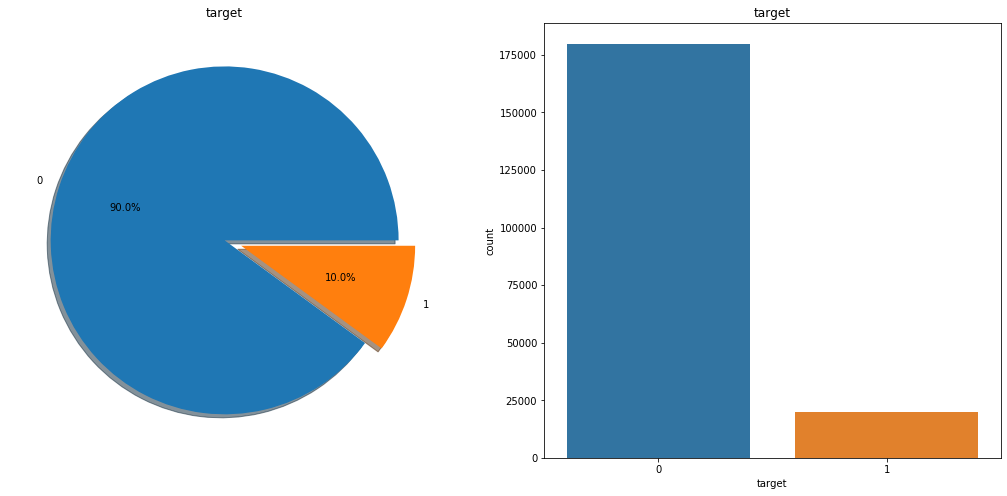

In [14]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
train_data['target'].value_counts().plot.pie(explode=[0,0.1],autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('target', data=train_data,ax=ax[1])
ax[1].set_title('target')
plt.show()

In [15]:
train_data['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [16]:
print("Skewness: %f " % train_data['target'].skew())
print("Kurtosis: %f" % train_data['target'].kurt())

Skewness: 2.657642 
Kurtosis: 5.063112


Duplicate Values

In [17]:
train_features = train_data.columns.values[2:202]
test_features = test_data.columns.values[1:201]

In [18]:
unique_train = []
unique_test = []
for feature in train_features:
    train_values = train_data[feature].value_counts()
    unique_train.append([feature, train_values.max(), train_values.idxmax()])
for feature in test_features:
    test_values = test_data[feature].value_counts()
    unique_test.append([feature, test_values.max(), test_values.idxmax()])

In [19]:
np.transpose((pd.DataFrame(unique_train, columns = ['Feature', 'Max Duplicates', 'Value']))
             .sort_values(by = 'Max Duplicates', ascending = False))

,68,108,126,12,91,103,148,71,161,25,125,169,166,133,43,15,131,93,23,34,98,95,53,50,105,28,197,42,57,130,181,6,59,156,144,111,189,66,114,192,162,9,195,112,79,132,64,99,104,78,106,116,121,27,4,3,186,16,81,146,153,31,62,191,115,46,198,150,37,36,32,33,14,179,89,88,177,29,175,2,152,138,8,128,127,168,124,123,63,143,119,194,109,7,0,94,22,190,165,183,85,20,72,151,77,69,129,56,75,145,39,113,35,21,170,24,52,1,60,65,58,110,188,92,171,155,154,157,173,184,159,140,163,147,38,164,180,141,172,122,13,55,26,118,87,44,107,10,18,49,193,134,185,101,174,48,176,102,11,178,67,97,167,139,117,73,80,142,76,135,40,41,149,17,54,82,83,84,86,137,196,182,100,160,158,5,19,45,47,51,70,74,90,96,120,199,61,187,30,136
Feature,var_68,var_108,var_126,var_12,var_91,var_103,var_148,var_71,var_161,var_25,var_125,var_169,var_166,var_133,var_43,var_15,var_131,var_93,var_23,var_34,var_98,var_95,var_53,var_50,var_105,var_28,var_197,var_42,var_57,var_130,var_181,var_6,var_59,var_156,var_144,var_111,var_189,var_66,var_114,var_192,var_162,var_9,var_195,var_112,var_79,var_132,var_64,var_99,var_104,var_78,var_106,var_116,var_121,var_27,var_4,var_3,var_186,var_16,var_81,var_146,var_153,var_31,var_62,var_191,var_115,var_46,var_198,var_150,var_37,var_36,var_32,var_33,var_14,var_179,var_89,var_88,var_177,var_29,var_175,var_2,var_152,var_138,var_8,var_128,var_127,var_168,var_124,var_123,var_63,var_143,var_119,var_194,var_109,var_7,var_0,var_94,var_22,var_190,var_165,var_183,var_85,var_20,var_72,var_151,var_77,var_69,var_129,var_56,var_75,var_145,var_39,var_113,var_35,var_21,var_170,var_24,var_52,var_1,var_60,var_65,var_58,var_110,var_188,var_92,var_171,var_155,var_154,var_157,var_173,var_184,var_159,var_140,var_163,var_147,var_38,var_164,var_180,var_141,var_172,var_122,var_13,var_55,var_26,var_118,var_87,var_44,var_107,var_10,var_18,var_49,var_193,var_134,var_185,var_101,var_174,var_48,var_176,var_102,var_11,var_178,var_67,var_97,var_167,var_139,var_117,var_73,var_80,var_142,var_76,var_135,var_40,var_41,var_149,var_17,var_54,var_82,var_83,var_84,var_86,var_137,var_196,var_182,var_100,var_160,var_158,var_5,var_19,var_45,var_47,var_51,var_70,var_74,var_90,var_96,var_120,var_199,var_61,var_187,var_30,var_136
Max Duplicates,1084,313,305,203,66,61,59,54,52,41,40,39,39,39,39,34,33,32,32,30,28,26,25,25,24,24,23,23,22,22,22,22,21,21,21,20,19,19,19,19,18,18,17,17,17,16,16,15,15,15,15,15,15,15,15,15,15,14,14,14,14,14,13,13,13,13,13,13,13,13,13,13,12,12,12,12,12,12,12,12,12,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6
Value,5.0214,14.1999,11.5356,13.5545,6.9537,1.6662,4.0456,0.7031,5.7688,13.6723,12.5159,5.6941,2.7306,6.8876,11.4522,14.6482,0.3544,10.5246,2.9116,11.1229,1.6382,-0.2434,6.4543,12.7809,4.1381,5.3723,8.0477,11.2294,5.971,12.5506,10.7953,5.1153,8.9119,12.8946,8.541,6.3614,1.2638,5.8024,3.137,1.0223,5.2866,7.2048,-0.935,4.0128,14.595,7.5026,6.6952,-0.18,11.6959,6.0926,7.9583,2.8572,10.2527,-0.5237,10.8911,6.8029,9.1323,10.743,15.621,10.9092,15.3669,9.6034,1.9836,4.3057,2.0175,12.2484,16.876,14.7278,4.9476,2.5371,-0.8917,11.1284,8.9383,3.6629,3.4309,8.5021,9.6888,3.7681,11.7786,9.1497,7.1892,3.5385,-2.2274,-1.7987,0.4506,3.8637,4.007,9.9008,2.7228,11.1857,-1.295,17.5033,14.7532,18.9966,8.6649,8.9787,5.2144,1.086,19.8594,8.2373,17.7063,8.5437,0.7613,12.4929,14.9139,-3.3505,13.0791,16.2287,11.8235,6.1191,-0.1072,11.6618,2.0915,13.9733,0.018,8.2132,-2.4091,-2.1515,14.039,1.5812,0.2844,4.3804,13.1492,11.4079,-0.9474,-0.4418,3.8581,-3.551,-3.3287,12.6965,9.5166,3.3403,10.1545,-0.9263,10.3302,0.2792,0.8005,-2.9293,20.4164,-1.2109,14.1195,21.2356,0.7814,-4.1726,13.1727,10.6472,22.8551,0.8671,10.2625,24.1343,2.4223,-4.8488,-3.1468,13.9182,20.0748,17.1433,-6.6483,17.523,-6.5005,0.6106,11.7277,26.9822,-2.0382,10.4777,25.5994,15.9571,2.0695,8.583,0.2529,0.751,-3

In [20]:
np.transpose((pd.DataFrame(unique_test, columns = ['Feature', 'Max Duplicates', 'Value']))
             .sort_values(by = 'Max Duplicates', ascending = False))

,68,126,108,12,91,103,148,161,25,71,43,166,125,169,133,23,131,15,93,34,98,50,95,53,130,197,57,6,28,42,105,66,59,144,162,189,181,111,114,192,9,156,195,79,37,99,132,112,32,36,4,64,62,116,27,121,146,153,106,194,124,104,38,127,143,145,119,186,3,29,78,115,81,109,179,113,2,31,8,150,16,0,152,175,39,177,123,198,94,14,69,185,110,72,128,138,190,65,63,188,58,56,46,88,89,191,49,92,122,140,151,164,170,159,84,107,80,7,11,22,24,35,193,168,1,33,87,101,10,163,118,157,154,20,180,41,44,142,52,77,76,129,135,75,85,139,13,160,18,158,19,155,183,173,97,26,171,196,5,82,134,40,178,141,174,165,184,172,182,100,167,86,30,47,51,55,60,67,149,73,83,199,96,117,147,137,90,48,17,21,70,120,176,61,187,102,74,136,45,54
Feature,var_68,var_126,var_108,var_12,var_91,var_103,var_148,var_161,var_25,var_71,var_43,var_166,var_125,var_169,var_133,var_23,var_131,var_15,var_93,var_34,var_98,var_50,var_95,var_53,var_130,var_197,var_57,var_6,var_28,var_42,var_105,var_66,var_59,var_144,var_162,var_189,var_181,var_111,var_114,var_192,var_9,var_156,var_195,var_79,var_37,var_99,var_132,var_112,var_32,var_36,var_4,var_64,var_62,var_116,var_27,var_121,var_146,var_153,var_106,var_194,var_124,var_104,var_38,var_127,var_143,var_145,var_119,var_186,var_3,var_29,var_78,var_115,var_81,var_109,var_179,var_113,var_2,var_31,var_8,var_150,var_16,var_0,var_152,var_175,var_39,var_177,var_123,var_198,var_94,var_14,var_69,var_185,var_110,var_72,var_128,var_138,var_190,var_65,var_63,var_188,var_58,var_56,var_46,var_88,var_89,var_191,var_49,var_92,var_122,var_140,var_151,var_164,var_170,var_159,var_84,var_107,var_80,var_7,var_11,var_22,var_24,var_35,var_193,var_168,var_1,var_33,var_87,var_101,var_10,var_163,var_118,var_157,var_154,var_20,var_180,var_41,var_44,var_142,var_52,var_77,var_76,var_129,var_135,var_75,var_85,var_139,var_13,var_160,var_18,var_158,var_19,var_155,var_183,var_173,var_97,var_26,var_171,var_196,var_5,var_82,var_134,var_40,var_178,var_141,var_174,var_165,var_184,var_172,var_182,var_100,var_167,var_86,var_30,var_47,var_51,var_55,var_60,var_67,var_149,var_73,var_83,var_199,var_96,var_117,var_147,var_137,var_90,var_48,var_17,var_21,var_70,var_120,var_176,var_61,var_187,var_102,var_74,var_136,var_45,var_54
Max Duplicates,1104,307,302,188,86,78,74,69,60,60,58,53,53,51,50,50,50,47,45,39,37,37,37,34,34,34,33,33,32,32,32,32,31,31,31,30,30,29,29,29,28,28,27,26,26,26,25,25,24,24,24,24,24,24,24,23,23,23,22,22,22,22,22,22,22,22,22,22,22,22,22,21,21,21,21,21,21,21,21,21,21,20,20,20,20,20,20,20,20,20,20,20,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,14,14,14,14,14,14,14,14,14,14,13,13,13,13
Value,5.0197,11.5357,14.1999,13.5546,6.9939,1.4659,4.0004,5.7114,13.5965,0.5389,11.5738,2.8446,12.2189,5.8455,6.6873,2.9221,0.3265,14.6942,10.6187,11.2193,1.0225,12.8912,-0.194,6.5766,12.8392,9.5016,5.7302,5.798,5.9894,11.0387,3.3719,6.0398,8.9371,9.2105,7.5066,0.6251,10.7881,6.9529,2.9413,1.0173,8.6081,13.5468,-0.2137,15.0354,7.7094,-0.2425,9.1007,3.4406,0.4417,2.1027,10.8383,6.5589,-0.3417,2.4437,0.4143,10.1664,9.6308,15.5627,8.2354,19.15,5.7666,12.0275,9.6369,2.1063,13.6478,6.017,6.5724,8.6338,8.5594,3.5037,6.7559,1.9325,16.0946,17.4315,0.6532,5.0017,10.3544,10.7076,-0.0851,17.7381,10.0245,9.5368,7.2468,11.811,-1.3914,10.2212,3.6722,15.8497,9.9767,8.262,-3.074,-0.9108,3.3815,-0.1238,-2.313,0.6413,3.8493,-0.1459,1.427,15.5564,1.4264,16.8198,10.757,10.5607,6.6205,6.7297,9.3305,12.0901,1.4779,3.1636,6.7802,-5.8343,-1.3647,5.6228,-7.3994,13.7155,2.0407,12.1081,0.2551,3.9621,13.4639,1.4012,6.0498,6.8616,-3.66,18.7479,11.4845,12.0391,4.9549,5.6249,-11.1899,-9.8936,8.0208,15.3813,-2.3766,9.0224,11.0209,13.4409,-3.3045,15.6696,10.2145,11.2065,4.6944,15.3218,17.8143,3.1637,11.7888,35.8174,7.2567,14.2265,9.0209,0.7637,7.1162,-1.5341,9.7624,-4.2819,-2.6905,6.0909,-11.9289,-9.846,-

Feature Engineering

In [21]:
for df in [train_data]:
    df['sum'] = df[train_features].sum(axis=1)
    df['min'] = df[train_features].min(axis=1)
    df['max'] = df[train_features].max(axis=1)
    df['mean'] = df[train_features].mean(axis=1)
    df['std'] = df[train_features].std(axis=1)
    df['skew'] = df[train_features].skew(axis=1)
    df['kurt'] = df[train_features].kurtosis(axis=1)
    df['median'] = df[train_features].median(axis=1)

In [22]:
train_data[train_data.columns[202:]].head(10)

,sum,min,max,mean,std,skew,kurt,median
0,1456.3182,-21.4494,43.1127,7.281591,9.331540,0.101580,1.331023,6.77040
1,1415.3636,-47.3797,40.5632,7.076818,10.336130,-0.351734,4.110215,7.22315
2,1240.8966,-22.4038,33.8820,6.204483,8.753387,-0.056957,0.546438,5.89940
3,1288.2319,-35.1659,38.1015,6.441159,9.594064,-0.480116,2.630499,6.70260
4,1354.2310,-65.4863,41.1037,6.771155,11.287122,-1.463426,9.787399,6.94735
5,1272.3216,-44.7257,35.2664,6.361608,9.313012,-0.920439,4.581343,6.23790
6,1509.4490,-29.9763,39.9599,7.547245,9.246130,-0.133489,1.816453,7.47605
7,1438.5083,-27.2543,31.9043,7.192542,9.162558,-0.300415,1.174273,6.97300
8,1369.7375,-31.7855,42.4798,6.848687,9.837520,0.084047,1.997040,6.32870
9,1303.1155,-39.3042,34.4640,6.515578,9.943238,-0.670024,2.521160,6.36320


In [23]:
for df in [test_data]:
    df['sum'] = df[test_features].sum(axis=1)
    df['min'] = df[test_features].min(axis=1)
    df['max'] = df[test_features].max(axis=1)
    df['mean'] = df[test_features].mean(axis=1)
    df['std'] = df[test_features].std(axis=1)
    df['skew'] = df[test_features].skew(axis=1)
    df['kurt'] = df[test_features].kurtosis(axis=1)
    df['median'] = df[test_features].median(axis=1)

In [24]:
test_data[test_data.columns[201:]].head(10)

,sum,min,max,mean,std,skew,kurt,median
0,1416.6404,-31.9891,42.0248,7.083202,9.910632,-0.088518,1.871262,7.31440
1,1249.6860,-41.1924,35.6020,6.248430,9.541267,-0.559785,3.391068,6.43960
2,1430.2599,-34.3488,39.3654,7.151299,9.967466,-0.135084,2.326901,7.26355
3,1411.4447,-21.4797,40.3383,7.057223,8.257204,-0.167741,2.253054,6.89675
4,1423.7364,-24.8254,45.5510,7.118682,10.043542,0.293484,2.044943,6.83375
5,1273.1592,-19.8952,30.2647,6.365796,8.728466,-0.031814,0.113763,5.83800
6,1440.7387,-18.7481,37.4611,7.203694,8.676615,-0.045407,0.653782,6.66335
7,1429.5281,-22.7363,33.2387,7.147640,9.697687,-0.017784,0.713021,7.44665
8,1270.4978,-17.4719,28.1225,6.352489,8.257376,-0.138639,0.342360,6.55820
9,1271.6875,-32.8776,38.3319,6.358438,9.489171,-0.354497,1.934290,6.83960


Models

In [25]:
cols = ['target', 'ID_code']
X = train_data.drop(cols,axis=1)
y = train_data['target']

In [26]:
X_test = test_data.drop("ID_code", axis = 1)

In [27]:
x_train, x_val, y_train, y_val = train_test_split(X,y, random_state = 1)

In [28]:
logistic_clf = LogisticRegression().fit(x_train,y_train)

In [29]:
preds = logistic_clf.predict(x_val)

In [30]:
metrics.mean_absolute_error(y_val, preds)

0.0896

In [31]:
metrics.mean_squared_error(y_val, preds)

0.0896

In [32]:
print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     45057
           1       0.67      0.19      0.29      4943

    accuracy                           0.91     50000
   macro avg       0.79      0.59      0.62     50000
weighted avg       0.89      0.91      0.89     50000



In [33]:
lr_auc = roc_auc_score(y_val,preds)

In [34]:
lr_auc

0.5887099888593472

In [35]:
lr_fpr, lr_tpr, _ = roc_curve(y_val,preds)

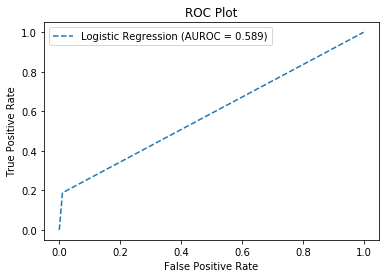

In [36]:
plt.plot(lr_fpr, lr_tpr, linestyle='--', label = 'Logistic Regression (AUROC = %0.3f)' %lr_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [37]:
random_forest_clf = RandomForestClassifier().fit(x_train,y_train)

In [38]:
preds_rf = random_forest_clf.predict(x_val)

In [39]:
metrics.mean_absolute_error(y_val, preds_rf)

0.09884

In [40]:
metrics.mean_squared_error(y_val, preds_rf)

0.09884

In [41]:
print(classification_report(y_val, preds_rf))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     45057
           1       1.00      0.00      0.00      4943

    accuracy                           0.90     50000
   macro avg       0.95      0.50      0.47     50000
weighted avg       0.91      0.90      0.85     50000



In [42]:
rf_auc = roc_auc_score(y_val,preds_rf)

In [43]:
rf_auc

0.5001011531458628

In [44]:
rf_fpr, rf_tpr, _ = roc_curve(y_val,preds_rf)

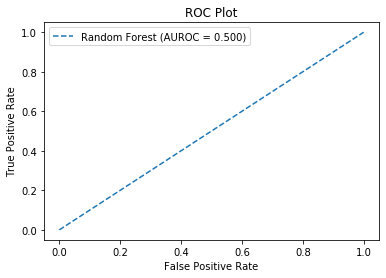

In [45]:
plt.plot(rf_fpr, rf_tpr, linestyle='--', label = 'Random Forest (AUROC = %0.3f)' %rf_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [46]:
columns = train_data.columns.tolist()
columns = [c for c in  columns if c not in ["target"]]
tar = "target"
X =train_data[columns]
Y =train_data[tar]

In [47]:
X.shape

(200000, 209)

In [48]:
Y.shape

(200000,)

In [49]:
One = train_data[train_data['target']==1]
Zero = train_data[train_data['target']==0]

In [50]:
One.shape

(20098, 210)

In [51]:
Zero.shape

(179902, 210)

In [52]:
from imblearn.under_sampling import NearMiss

In [53]:
from imblearn.under_sampling import RandomUnderSampler  

In [54]:
under_sampler = RandomUnderSampler()

In [55]:
X_res, y_res = under_sampler.fit_resample(X,Y)

In [56]:
y_res.value_counts()

0    20098
1    20098
Name: target, dtype: int64

In [57]:
X_res.shape

(40196, 209)

In [58]:
X_res.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,sum,min,max,mean,std,skew,kurt,median
0,train_125151,9.4807,2.4312,11.7159,6.0038,9.7014,-15.3510,3.9257,14.3204,1.4710,5.9469,2.2256,-7.7368,14.2095,5.8248,10.7886,14.4980,7.4691,-11.1233,0.4667,13.0683,21.7759,20.2201,7.2366,3.1934,12.2772,14.0465,4.9618,-0.0673,4.5686,5.9635,4.5986,7.9608,-3.9847,16.8349,10.4444,0.7767,7.2708,5.5959,6.8100,-4.0299,-6.3866,10.7449,10.2726,11.2511,11.0374,-50.1796,15.3251,-34.7123,35.7368,19.5140,12.6361,9.3194,-0.5132,6.1848,3.8006,18.2273,17.7051,6.4785,1.0012,9.7429,14.6493,-11.3803,1.0663,-2.1749,7.3023,0.2283,5.9306,19.3482,5.0038,-1.7407,27.8272,0.9020,5.9335,13.7303,29.8503,21.7426,4.6969,18.4752,5.5018,14.3924,-0.2147,18.0691,-9.4726,-1.5424,-14.8668,14.1114,10.7886,17.4015,6.4112,6.6980,-17.1111,6.7008,9.3305,10.5893,11.8501,0.0552,-2.5459,44.6463,0.7291,2.6005,5.3023,11.5784,16.9557,1.5528,10.5690,4.3293,10.3797,26.7847,14.2305,13.9745,8.0036,5.7066,3.6127,13.8051,2.4404,1.7987,4.7659,39.1002,-10.8947,5.8197,8.6557,9.7082,6.9718,7.2593,2.9206,12.2687,13.5080,3.0573,-2.7031,16.4083,12.6740,0.9549,9.1701,7.0388,-14.7236,-4.8458,10.3312,6.4787,-10.0216,16.0676,-0.7367,-2.6135,17.0697,6.3123,9.6105,1.4920,10.5488,-4.0054,3.8216,-9.5810,15.6145,4.1716,3.9179,14.4620,12.5274,-2.5457,13.3851,-2.8119,21.7644,10.3709,29.9496,5.0865,3.4007,15.8243,-4.2081,25.7345,2.7127,1.3918,-3.5740,5.2704,1.2435,-2.4932,19.0416,8.9643,14.5940,8.6954,12.9593,9.7493,-0.1665,7.5717,-4.2918,8.4649,-18.5526,8.6035,5.1655,-6.6673,8.2470,-9.2275,12.0157,0.2937,-4.2720,10.5835,3.0099,6.7429,19.9444,0.9969,2.8623,8.9240,13.0125,-21.4809,1278.3807,-50.1796,44.6463,6.391904,10.917137,-0.675084,4.817527,6.58835
1,train_194955,6.4347,-4.1792,12.9535,7.1146,10.5852,-5.6220,5.8482,9.6113,-3.2515,7.8842,3.1944,-3.5508,14.1947,13.1586,10.7705,14.6239,7.1010,4.7959,18.7598,7.9929,6.5771,10.9871,3.4060,2.8578,9.9918,13.5313,-3.5288,0.7443,4.7035,8.8375,-6.2765,10.9542,5.3006,8.0375,11.0091,-3.0354,-0.5310,4.8661,11.6216,2.4078,-1.0675,3.6079,10.9585,11.7672,4.6174,5.7700,10.0732,-13.0366,15.9705,18.6526,11.9716,16.3887,-4.5178,5.1738,3.2558,23.4899,21.2211,6.7097,5.2425,9.7415,7.1519,-28.9556,3.3268,-2.7188,6.3476,-1.0003,5.4499,19.0933,5.0222,-4.5704,47.0781,0.7181,-6.9350,26.4411,26.2072,28.0827,10.5797,15.3185,5.8955,15.2231,16.4322,14.4800,13.1044,9.9064,-7.3942,13.6230,-9.9783,9.8785,6.9476,5.6733,-24.2764,7.1604,16.5136,10.4717,14.5546,-0.3882,19.7995,16.6888,1.8620,-0.9775,0.6675,15.3835,13.4840,1.5491,9.4950,4.9956,9.7319,20.1300,14.0737,22.1928,9

In [59]:
X, y = under_sampler.fit_resample(X,Y)

In [60]:
X.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,sum,min,max,mean,std,skew,kurt,median
0,train_66911,14.6070,-1.0579,6.1992,9.9753,9.8106,-3.8267,5.4252,20.5313,3.5529,8.9869,11.0629,-10.5232,14.2438,11.8198,4.3029,15.0281,10.7199,6.1381,7.9039,8.9888,11.6649,14.0222,5.9592,2.0221,7.7003,14.1405,-7.6758,-0.4000,5.0878,4.8970,-13.7848,13.9410,-4.2388,20.0848,12.2251,-1.1194,1.7283,7.0244,8.0516,5.4476,-3.9190,15.8296,11.4493,11.7193,13.1301,-17.3736,17.5577,-20.8945,18.3746,24.0376,13.5033,-1.1063,-1.0534,6.8533,-0.2881,6.9483,15.0873,6.9354,-1.4276,8.6208,17.5345,12.2367,1.7057,6.3251,5.2701,3.1746,4.8542,12.0436,5.0161,-3.5354,3.2589,0.6124,-1.2989,22.1858,8.1243,20.0032,4.4250,14.0132,6.6028,13.5855,8.9132,16.2960,-9.6016,4.4313,-7.3943,15.2363,-5.4286,13.4351,8.7045,5.3544,-10.4102,6.8983,10.7205,11.2310,14.0025,0.3257,22.2112,20.7566,1.4677,-1.2512,-13.0826,10.4862,21.9437,1.7779,15.8668,5.9019,8.3733,20.1397,13.9164,20.4225,2.4633,6.9507,4.2123,5.1507,2.3923,4.8506,1.9545,2.9471,7.5638,9.5352,37.4109,11.6670,7.7098,4.1028,5.3268,12.2953,14.2438,-1.3800,-0.2378,14.8114,12.1772,0.9209,6.8598,6.2598,-9.7831,-8.1612,22.6332,13.4723,-1.0454,-11.1825,-0.7303,-0.8100,11.9236,10.2669,8.2928,9.5367,7.7215,-7.6980,4.2099,15.8652,17.3228,9.5906,10.7204,18.5984,7.4436,-1.4812,14.6779,-10.6590,10.5511,5.2401,23.4156,5.5889,3.8668,3.5876,7.5594,28.1188,2.4620,-10.7667,0.9244,5.2621,1.1213,4.2511,9.9811,-9.2505,9.0826,10.4942,10.6092,7.9996,7.1978,5.2834,-6.0000,11.1467,10.3277,15.6760,22.8785,4.9305,6.3424,-1.0180,19.6225,-0.1866,-5.7479,7.7880,1.9181,1.5889,20.9643,-1.7296,7.5713,7.7218,16.7437,-5.9499,1360.5141,-20.8945,37.4109,6.802571,8.827964,-0.147192,0.676604,6.9495
1,train_25339,9.5202,1.5628,10.9875,9.4364,10.0758,-12.2662,5.6289,12.5896,1.9115,8.2007,3.8605,2.9416,13.8859,11.1120,3.2778,14.9582,6.2488,7.7359,6.3129,21.4787,14.5713,17.7115,5.9286,3.2540,15.1186,13.1522,-10.6058,-1.2317,6.0706,6.5993,-14.7736,14.8902,-1.6676,17.9774,11.1462,10.8606,7.7685,8.5449,10.2617,2.9404,-12.2043,1.6624,11.5476,11.5862,16.8229,13.3953,10.6098,3.2551,21.3153,27.4641,14.3042,15.7727,-2.9874,5.5527,12.1940,6.5786,15.3837,6.5860,0.4908,9.8378,16.2007,-9.4814,2.1723,6.5788,6.2195,9.4229,5.9202,-5.9452,5.0220,-2.4688,33.1413,0.7195,4.9332,26.9157,22.7396,14.1673,13.9378,24.7842,7.7967,12.8295,2.7374,10.9613,-11.9198,-8.7179,-0.9245,11.1699,9.2796,13.2508,8.0677,0.5085,-15.2997,6.9035,13.8719,10.3262,7.2666,0.4186,19.1368,26.8582,2.1888,-4.0452,2.2117,7.8379,32.1799,1.7093,8.9208,4.9421,9.4211,7.5439,14.2124,24.4424,4.7409,

In [63]:
y.value_counts()

0    20098
1    20098
Name: target, dtype: int64

In [64]:
cols = ['ID_code', 'sum', 'min', 'max', 'mean', 'std', 'skew', 'kurt', 'median']
X = X.drop(cols,axis=1)

In [65]:
X.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,14.6070,-1.0579,6.1992,9.9753,9.8106,-3.8267,5.4252,20.5313,3.5529,8.9869,11.0629,-10.5232,14.2438,11.8198,4.3029,15.0281,10.7199,6.1381,7.9039,8.9888,11.6649,14.0222,5.9592,2.0221,7.7003,14.1405,-7.6758,-0.4000,5.0878,4.8970,-13.7848,13.9410,-4.2388,20.0848,12.2251,-1.1194,1.7283,7.0244,8.0516,5.4476,-3.9190,15.8296,11.4493,11.7193,13.1301,-17.3736,17.5577,-20.8945,18.3746,24.0376,13.5033,-1.1063,-1.0534,6.8533,-0.2881,6.9483,15.0873,6.9354,-1.4276,8.6208,17.5345,12.2367,1.7057,6.3251,5.2701,3.1746,4.8542,12.0436,5.0161,-3.5354,3.2589,0.6124,-1.2989,22.1858,8.1243,20.0032,4.4250,14.0132,6.6028,13.5855,8.9132,16.2960,-9.6016,4.4313,-7.3943,15.2363,-5.4286,13.4351,8.7045,5.3544,-10.4102,6.8983,10.7205,11.2310,14.0025,0.3257,22.2112,20.7566,1.4677,-1.2512,-13.0826,10.4862,21.9437,1.7779,15.8668,5.9019,8.3733,20.1397,13.9164,20.4225,2.4633,6.9507,4.2123,5.1507,2.3923,4.8506,1.9545,2.9471,7.5638,9.5352,37.4109,11.6670,7.7098,4.1028,5.3268,12.2953,14.2438,-1.3800,-0.2378,14.8114,12.1772,0.9209,6.8598,6.2598,-9.7831,-8.1612,22.6332,13.4723,-1.0454,-11.1825,-0.7303,-0.8100,11.9236,10.2669,8.2928,9.5367,7.7215,-7.6980,4.2099,15.8652,17.3228,9.5906,10.7204,18.5984,7.4436,-1.4812,14.6779,-10.6590,10.5511,5.2401,23.4156,5.5889,3.8668,3.5876,7.5594,28.1188,2.4620,-10.7667,0.9244,5.2621,1.1213,4.2511,9.9811,-9.2505,9.0826,10.4942,10.6092,7.9996,7.1978,5.2834,-6.0000,11.1467,10.3277,15.6760,22.8785,4.9305,6.3424,-1.0180,19.6225,-0.1866,-5.7479,7.7880,1.9181,1.5889,20.9643,-1.7296,7.5713,7.7218,16.7437,-5.9499
1,9.5202,1.5628,10.9875,9.4364,10.0758,-12.2662,5.6289,12.5896,1.9115,8.2007,3.8605,2.9416,13.8859,11.1120,3.2778,14.9582,6.2488,7.7359,6.3129,21.4787,14.5713,17.7115,5.9286,3.2540,15.1186,13.1522,-10.6058,-1.2317,6.0706,6.5993,-14.7736,14.8902,-1.6676,17.9774,11.1462,10.8606,7.7685,8.5449,10.2617,2.9404,-12.2043,1.6624,11.5476,11.5862,16.8229,13.3953,10.6098,3.2551,21.3153,27.4641,14.3042,15.7727,-2.9874,5.5527,12.1940,6.5786,15.3837,6.5860,0.4908,9.8378,16.2007,-9.4814,2.1723,6.5788,6.2195,9.4229,5.9202,-5.9452,5.0220,-2.4688,33.1413,0.7195,4.9332,26.9157,22.7396,14.1673,13.9378,24.7842,7.7967,12.8295,2.7374,10.9613,-11.9198,-8.7179,-0.9245,11.1699,9.2796,13.2508,8.0677,0.5085,-15.2997,6.9035,13.8719,10.3262,7.2666,0.4186,19.1368,26.8582,2.1888,-4.0452,2.2117,7.8379,32.1799,1.7093,8.9208,4.9421,9.4211,7.5439,14.2124,24.4424,4.7409,6.4691,3.0279,3.6836,3.9926,-0.8211,3.6240,15.4970,-7.8545,9.1950,7.5478,14.5519,3.2291,-0.2387,7.6510,11.9401,13.6956,2.9689,2.0383,26.1492,

In [66]:
x_undertrain, x_underval, y_undertrain, y_underval = train_test_split(X,y, random_state = 1)

In [67]:
random_forest_clf = RandomForestClassifier().fit(x_undertrain,y_undertrain)

In [68]:
preds_rf = random_forest_clf.predict(x_underval)

In [69]:
metrics.mean_absolute_error(y_underval, preds_rf)

0.258533187381829

In [70]:
metrics.mean_squared_error(y_underval, preds_rf)

0.258533187381829

In [71]:
print(classification_report(y_underval, preds_rf))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      5053
           1       0.74      0.75      0.74      4996

    accuracy                           0.74     10049
   macro avg       0.74      0.74      0.74     10049
weighted avg       0.74      0.74      0.74     10049



In [72]:
rf_auc = roc_auc_score(y_underval,preds_rf)

In [73]:
rf_auc

0.7415160705647438

In [74]:
rf_fpr, rf_tpr, _ = roc_curve(y_underval,preds_rf)

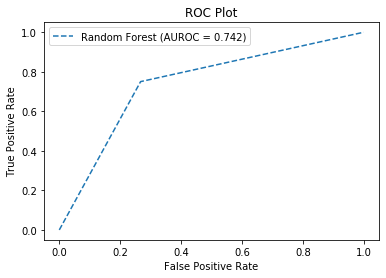

In [75]:
plt.plot(rf_fpr, rf_tpr, linestyle='--', label = 'Random Forest (AUROC = %0.3f)' %rf_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [76]:
logistic_clf = LogisticRegression().fit(x_undertrain,y_undertrain)

In [77]:
preds = logistic_clf.predict(x_underval)

In [78]:
metrics.mean_absolute_error(y_underval, preds)

0.2297741068763061

In [80]:
metrics.mean_squared_error(y_underval, preds)

0.2297741068763061

In [81]:
print(classification_report(y_underval, preds))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      5053
           1       0.77      0.77      0.77      4996

    accuracy                           0.77     10049
   macro avg       0.77      0.77      0.77     10049
weighted avg       0.77      0.77      0.77     10049



In [82]:
lr_auc = roc_auc_score(y_underval,preds)

In [84]:
lr_auc

0.7702472882719396

In [85]:
lr_fpr, lr_tpr, _ = roc_curve(y_underval,preds)

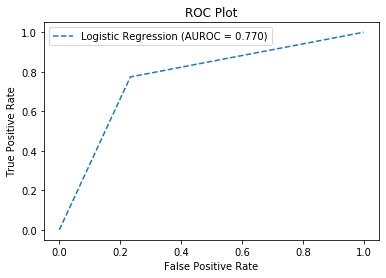

In [86]:
plt.plot(lr_fpr, lr_tpr, linestyle='--', label = 'Logistic Regression (AUROC = %0.3f)' %lr_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [87]:
from sklearn import svm

In [88]:
clf = svm.SVC()

In [89]:
clf.fit(x_undertrain,y_undertrain)

SVC()

In [96]:
preds = clf.predict(x_underval)

In [93]:
metrics.mean_absolute_error(y_underval, preds)

0.23206289183003284

In [94]:
metrics.mean_squared_error(y_underval, preds)

0.23206289183003284

In [95]:
print(classification_report(y_underval, preds))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      5053
           1       0.77      0.76      0.77      4996

    accuracy                           0.77     10049
   macro avg       0.77      0.77      0.77     10049
weighted avg       0.77      0.77      0.77     10049



In [97]:
lr_auc = roc_auc_score(y_underval,preds)

In [98]:
lr_auc

0.7679002889626168

In [99]:
lr_fpr, lr_tpr, _ = roc_curve(y_underval,preds)

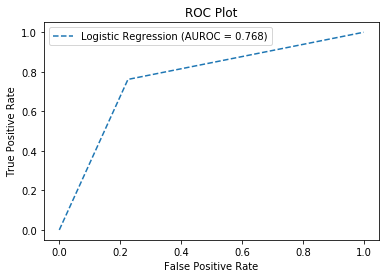

In [100]:
plt.plot(lr_fpr, lr_tpr, linestyle='--', label = 'Logistic Regression (AUROC = %0.3f)' %lr_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [103]:
columns = train_data.columns.tolist()
columns = [c for c in  columns if c not in ["target"]]
tar = "target"
X =train_data[columns]
Y =train_data[tar]

In [101]:
from imblearn.over_sampling import RandomOverSampler

In [102]:
over_sampler = RandomOverSampler()

In [104]:
X,y = over_sampler.fit_resample(X,Y)

In [114]:
cols = ['ID_code', 'sum', 'min', 'max', 'mean', 'std', 'skew', 'kurt', 'median']
X = X.drop(cols,axis=1)

In [115]:
X.shape

(359804, 200)

In [116]:
y.shape

(359804,)

In [117]:
y.value_counts()

0    179902
1    179902
Name: target, dtype: int64

In [118]:
x_overtrain, x_overval, y_overtrain, y_overval = train_test_split(X,y, random_state = 1)

In [119]:
logistic_clf = LogisticRegression().fit(x_overtrain,y_overtrain)

In [120]:
preds = logistic_clf.predict(x_overval)

In [121]:
metrics.mean_absolute_error(y_overval, preds)

0.22744605396271303

In [122]:
metrics.mean_squared_error(y_overval, preds)

0.22744605396271303

In [123]:
print(classification_report(y_overval, preds))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77     44932
           1       0.77      0.77      0.77     45019

    accuracy                           0.77     89951
   macro avg       0.77      0.77      0.77     89951
weighted avg       0.77      0.77      0.77     89951



In [124]:
lr_auc = roc_auc_score(y_overval,preds)

In [125]:
lr_auc

0.7725541311106353

In [126]:
lr_fpr, lr_tpr, _ = roc_curve(y_overval,preds)

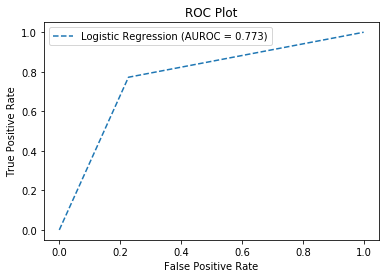

In [127]:
plt.plot(lr_fpr, lr_tpr, linestyle='--', label = 'Logistic Regression (AUROC = %0.3f)' %lr_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [128]:
random_forest_clf = RandomForestClassifier().fit(x_overtrain,y_overtrain)

In [135]:
preds = random_forest_clf.predict(x_overval)

In [136]:
metrics.mean_absolute_error(y_overval, preds)

0.0004446865515669642

In [137]:
metrics.mean_squared_error(y_overval, preds)

0.0004446865515669642

In [138]:
print(classification_report(y_overval, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44932
           1       1.00      1.00      1.00     45019

    accuracy                           1.00     89951
   macro avg       1.00      1.00      1.00     89951
weighted avg       1.00      1.00      1.00     89951



In [139]:
lr_auc = roc_auc_score(y_overval,preds)

In [140]:
lr_auc

0.9995557001208548

In [141]:
lr_fpr, lr_tpr, _ = roc_curve(y_overval,preds)

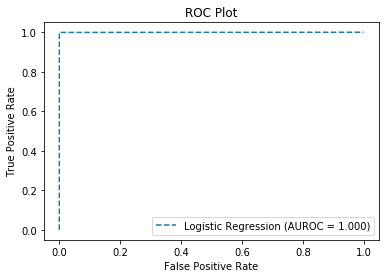

In [142]:
plt.plot(lr_fpr, lr_tpr, linestyle='--', label = 'Logistic Regression (AUROC = %0.3f)' %lr_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()